In [60]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


os.chdir(r'C:\Users\peter\Desktop\1. Learning\1. Project Dataset\Apartment Price dataset')

In [2]:
df = pd.read_excel('rentcrime.xlsx')

In [3]:
df_backup = df.copy()

In [8]:
pd.set_option('display.max_columns', None)
df.head(5)

,ListingNo,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,train,year,month,population,racepctblack,racePctWhite,racePctAsian,racePctHisp,medIncome,medFamInc,murdPerPop,rapesPerPop,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop,avg_crime
0,0,basic,1.0,1,Thumbnail,1,2195.0,542,RedondoBeach,CA,33.8520,-118.3759,RentLingo,1,2019,12,60167.0,0.0160,0.8704,0.0683,0.1150,51913.0,58760.0,6.20,26.33,224.60,342.32,1315.08,3348.87,968.11,4.65,599.45,5636.70,1247.231
1,1,basic,1.5,3,Thumbnail,1,1250.0,1500,NewportNews,VA,37.0867,-76.4941,RentLingo,1,2019,12,170045.0,0.3357,0.6258,0.0233,0.0277,27469.0,31180.0,12.16,56.93,39.24,737.30,1161.22,4016.47,378.05,34.82,845.63,5590.56,1287.238
2,2,basic,2.0,3,Thumbnail,0,1395.0,1650,Raleigh,NC,35.8230,-78.6438,RentLingo,1,2019,12,207951.0,0.2758,0.6918,0.0247,0.0141,32451.0,42212.0,11.21,39.02,330.02,462.45,1223.37,3900.10,366.56,12.04,842.70,5502.07,1268.954
3,3,basic,1.0,2,Thumbnail,1,1600.0,820,Vacaville,CA,38.3622,-121.9712,RentLingo,1,2019,12,71479.0,0.0891,0.7884,0.0381,0.1590,40679.0,43574.0,1.20,23.97,89.90,318.85,674.86,2878.03,261.31,32.36,433.92,3846.57,856.097
4,4,basic,1.0,1,Thumbnail,1,975.0,624,Albuquerque,NM,35.1038,-106.6110,RentLingo,1,2019,12,384736.0,0.0298,0.7824,0.0173,0.3449,27555.0,33746.0,11.91,61.71,369.78,1151.97,1953.47,4896.67,852.49,55.04,1595.37,7757.66,1870.607


In [18]:
print(df.describe())

           ListingNo      bathrooms       bedrooms   pets_allowed  \
count  108120.000000  108120.000000  108120.000000  108120.000000   
mean    54213.644266       1.441010       1.731373       0.409489   
std     31437.168643       0.554532       0.769701       0.491742   
min         0.000000       1.000000       0.000000       0.000000   
25%     27029.750000       1.000000       1.000000       0.000000   
50%     54059.500000       1.000000       2.000000       0.000000   
75%     81213.250000       2.000000       2.000000       1.000000   
max    109380.000000       9.000000       9.000000       1.000000   

               price    square_feet       latitude      longitude  \
count  108120.000000  108120.000000  108120.000000  108120.000000   
mean     1530.031733     955.496902      36.977872     -91.728808   
std       918.917577     383.929279       4.682570      15.848901   
min       100.000000     107.000000      24.564500    -151.080600   
25%      1010.000000     721.0000

In [10]:
print(df.isnull().sum())

ListingNo              0
amenities              0
bathrooms              0
bedrooms               0
has_photo              0
pets_allowed           0
price                  0
square_feet            0
cityname               0
state                  0
latitude               0
longitude              0
source                 0
train                  0
year                   0
month                  0
population             0
racepctblack           0
racePctWhite           0
racePctAsian           0
racePctHisp            0
medIncome              0
medFamInc              0
murdPerPop             0
rapesPerPop            0
robbbPerPop            0
assaultPerPop          0
burglPerPop            0
larcPerPop             0
autoTheftPerPop        0
arsonsPerPop           0
ViolentCrimesPerPop    0
nonViolPerPop          0
avg_crime              0
dtype: int64


C:\Users\peter\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


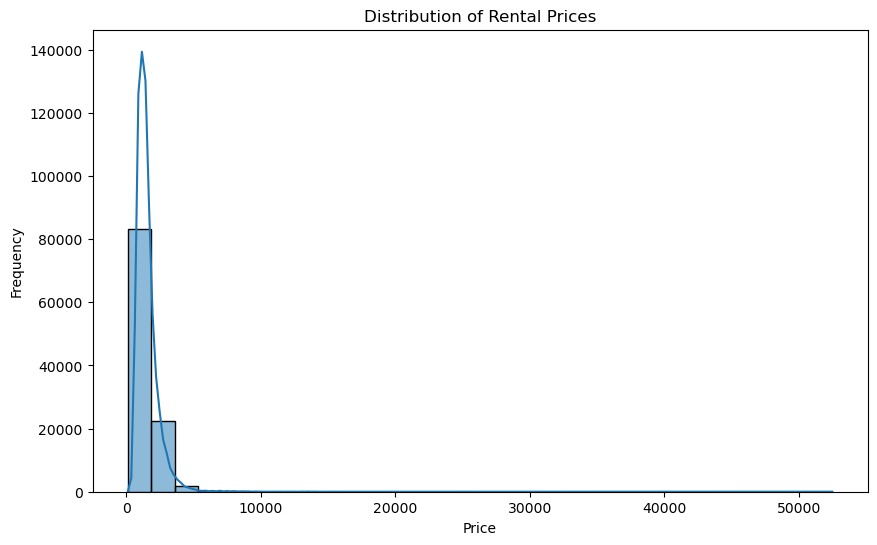

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Rental Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

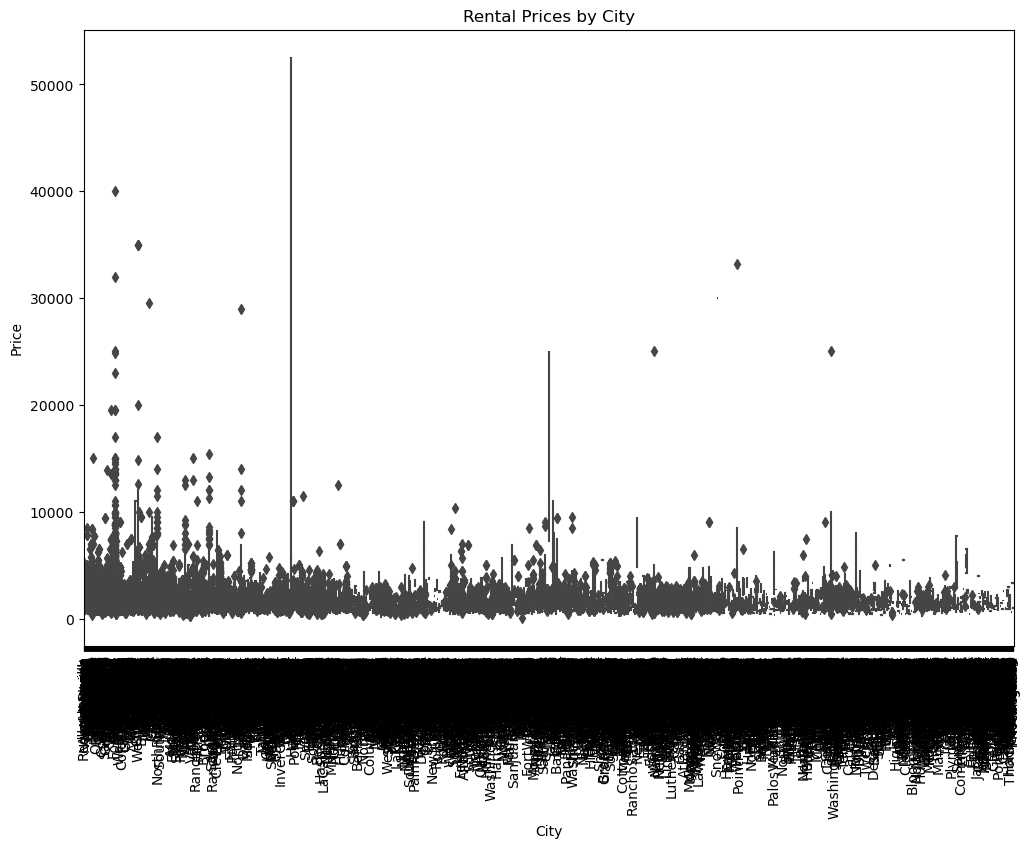

In [12]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='cityname', y='price', data=df)
plt.title('Rental Prices by City')
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Price')
plt.show()

C:\Users\peter\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


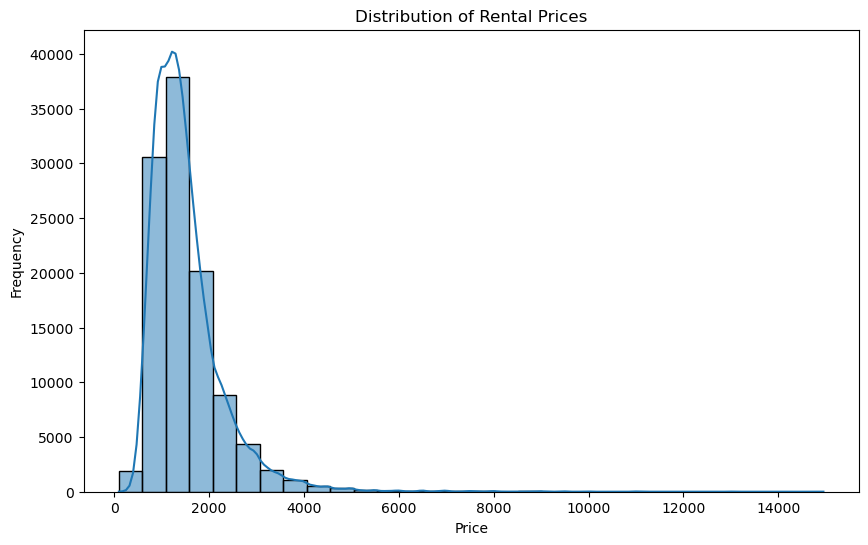

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(dfmod['price'], bins=30, kde=True)
plt.title('Distribution of Rental Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

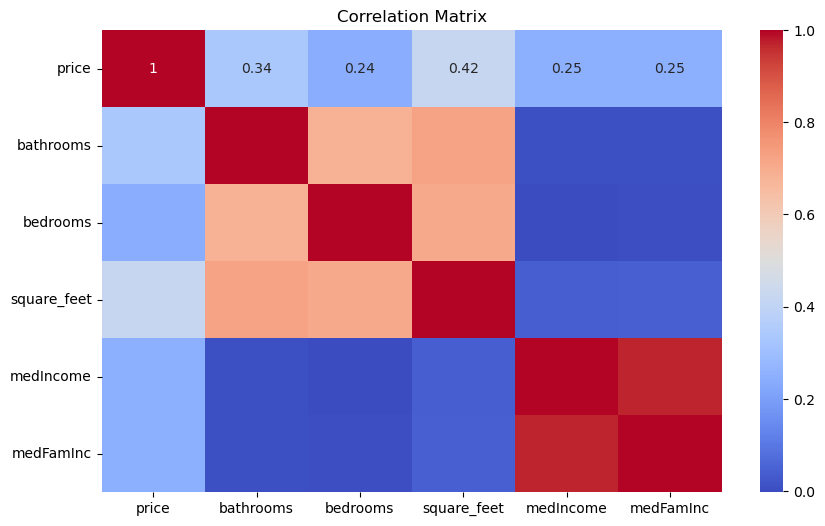

In [13]:
corr_matrix = df[['price', 'bathrooms', 'bedrooms', 'square_feet', 'medIncome', 'medFamInc']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Observation - medIncome and medFamInc are highly corelated, hence need to remove one in LR

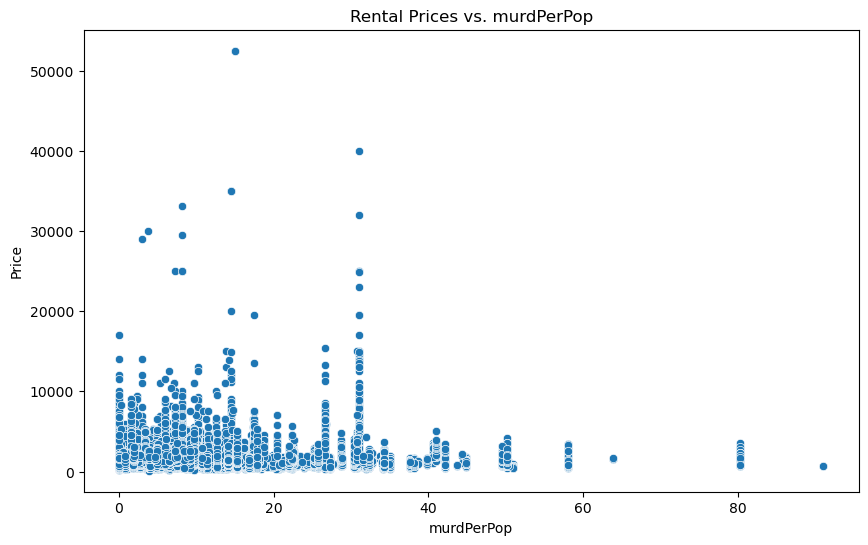

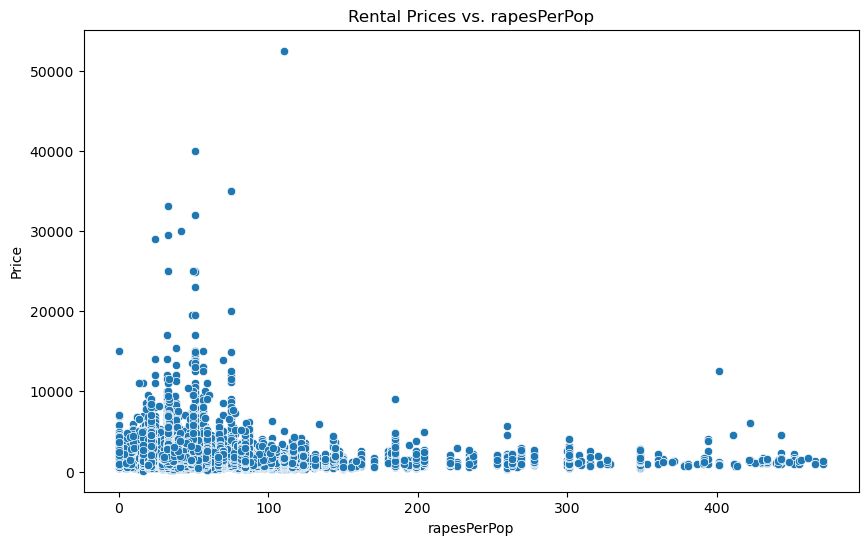

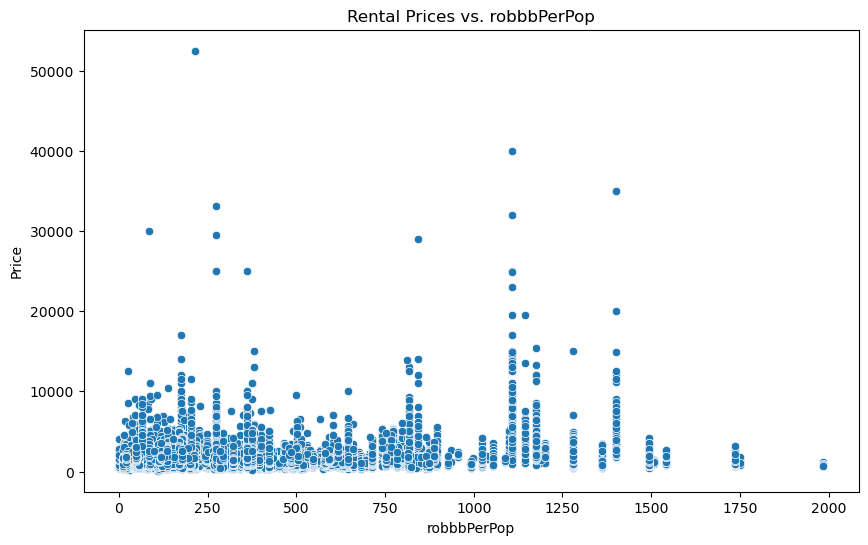

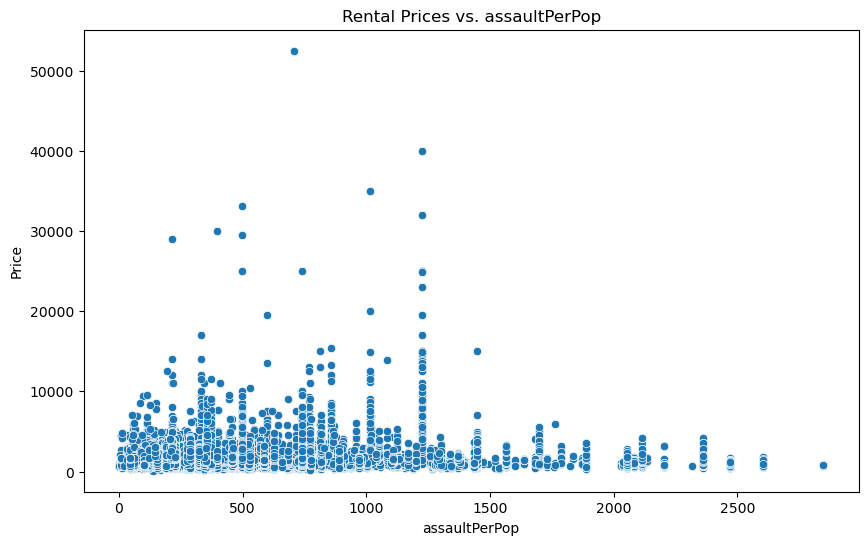

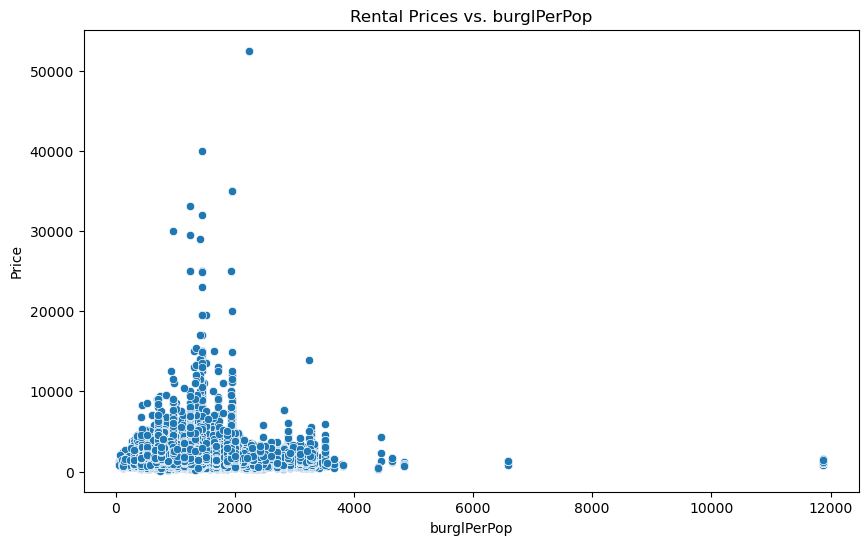

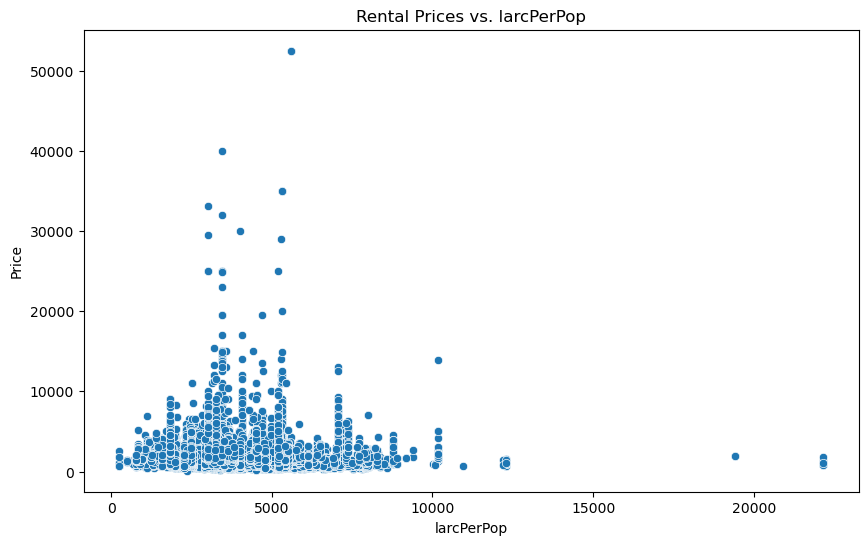

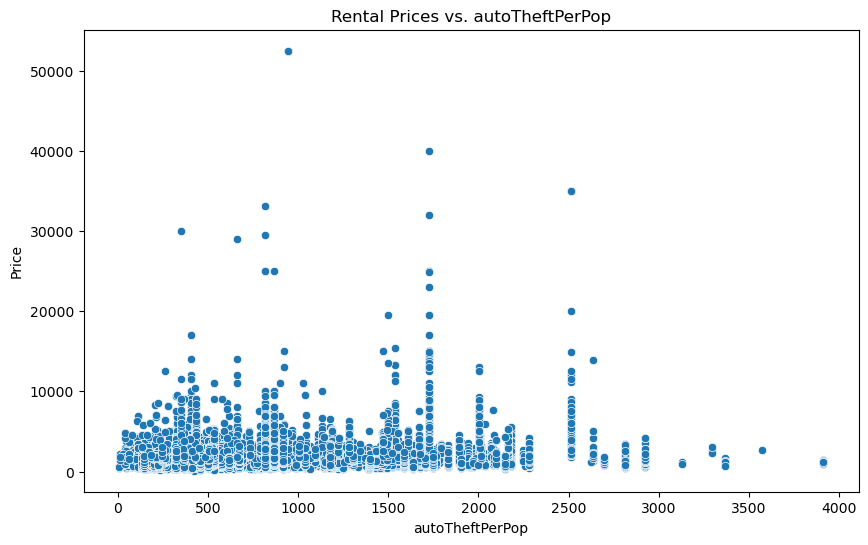

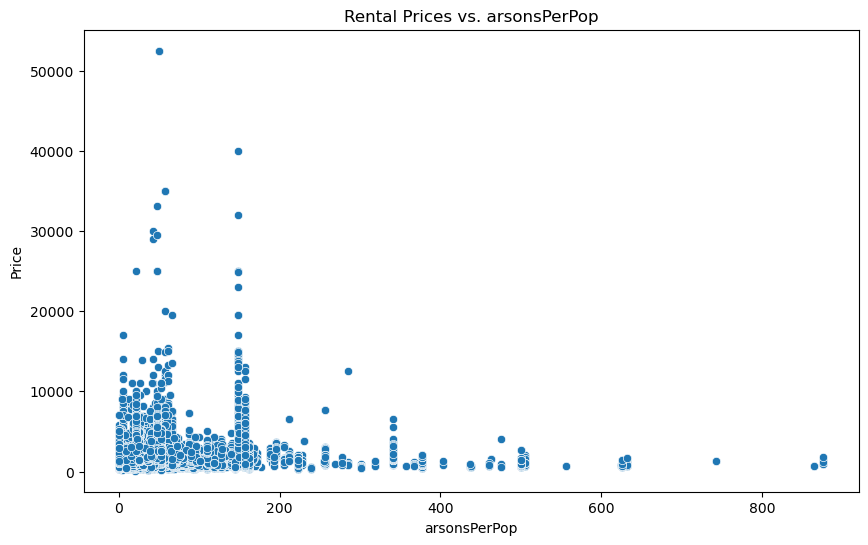

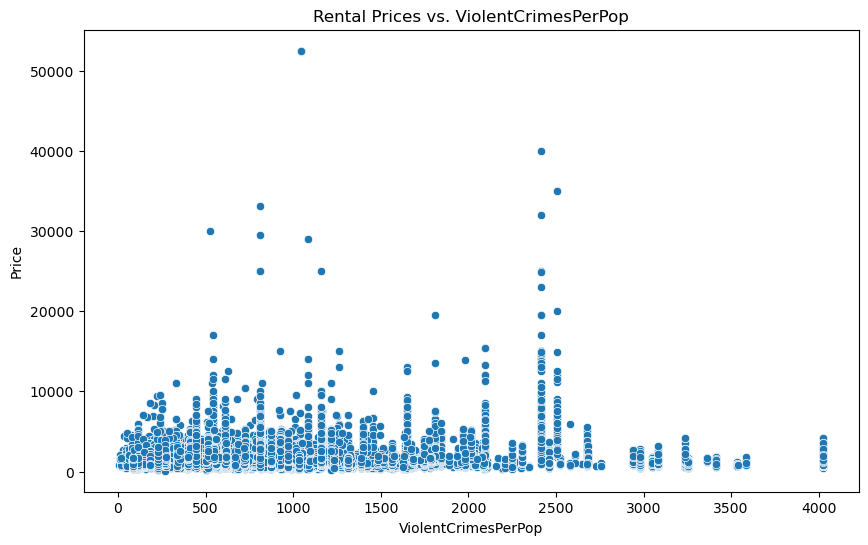

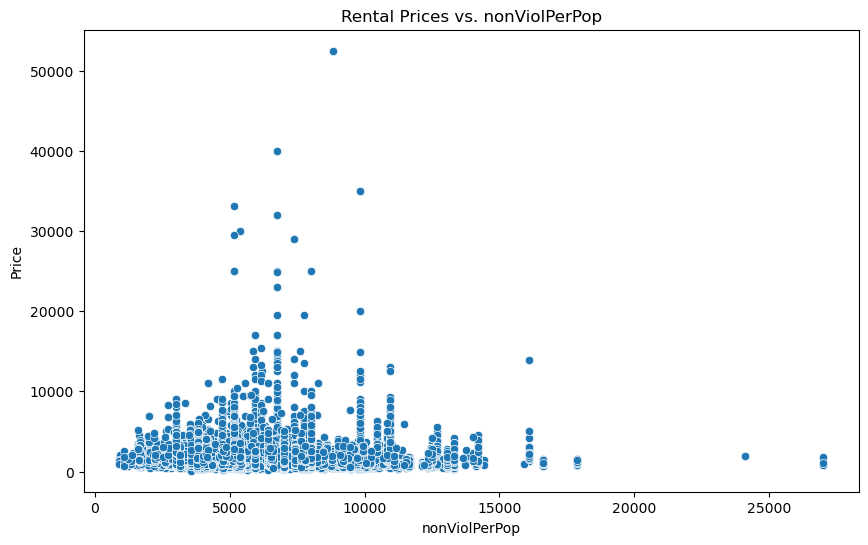

In [14]:
crime_features = ['murdPerPop', 'rapesPerPop', 'robbbPerPop', 'assaultPerPop', 
                  'burglPerPop', 'larcPerPop', 'autoTheftPerPop', 'arsonsPerPop', 
                  'ViolentCrimesPerPop', 'nonViolPerPop']

for crime in crime_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=crime, y='price', data=df)
    plt.title(f'Rental Prices vs. {crime}')
    plt.xlabel(crime)
    plt.ylabel('Price')
    plt.show()

In [15]:
# Example: Price per square foot
# To take out the variation created by Square footage, as in the sheer size of the house, we take the avg price per square foot also, to better understand effect of crime on rent prices

df['price_per_sqft'] = df['price'] / df['square_feet']

C:\Users\peter\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


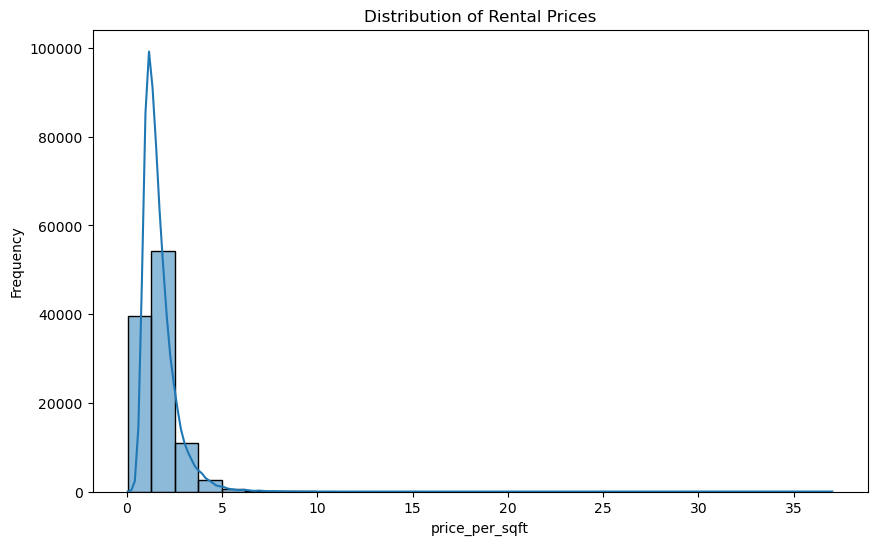

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], bins=30, kde=True)
plt.title('Distribution of Rental Prices')
plt.xlabel('price_per_sqft')
plt.ylabel('Frequency')
plt.show()

In [19]:


bins = [0, 1000, 3000, 6000, 9000, 12000, 15000, 18000, 21000, 24000, 27000, 30000, 33000, 36000, 39000, 42000, 45000, 48000, 51000, 54000, float('inf')]
labels = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]
df['price_bucket'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

df['pricebucketavg'] = df['price_bucket'].astype(float)
df.drop(columns=['price_bucket'], inplace=True)


In [20]:
price_per_sqft_bins = [0, 0.5, 1, 1.5, 2.5, 5, float('inf')]
price_per_sqft_labels = [(price_per_sqft_bins[i] + price_per_sqft_bins[i+1]) / 2 for i in range(len(price_per_sqft_bins)-1)]
df['price_per_sqft_bucket'] = pd.cut(df['price_per_sqft'], bins=price_per_sqft_bins, labels=price_per_sqft_labels, right=False)
df['pricepersqftbucketavg'] = df['price_per_sqft_bucket'].astype(float)

df.drop(columns=['price_per_sqft_bucket'], inplace=True)


In [21]:
df.head()

,ListingNo,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,train,year,month,population,racepctblack,racePctWhite,racePctAsian,racePctHisp,medIncome,medFamInc,murdPerPop,rapesPerPop,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop,avg_crime,price_per_sqft,pricebucketavg,pricepersqftbucketavg
0,0,basic,1.0,1,Thumbnail,1,2195.0,542,RedondoBeach,CA,33.8520,-118.3759,RentLingo,1,2019,12,60167.0,0.0160,0.8704,0.0683,0.1150,51913.0,58760.0,6.20,26.33,224.60,342.32,1315.08,3348.87,968.11,4.65,599.45,5636.70,1247.231,4.049815,2000.0,3.75
1,1,basic,1.5,3,Thumbnail,1,1250.0,1500,NewportNews,VA,37.0867,-76.4941,RentLingo,1,2019,12,170045.0,0.3357,0.6258,0.0233,0.0277,27469.0,31180.0,12.16,56.93,39.24,737.30,1161.22,4016.47,378.05,34.82,845.63,5590.56,1287.238,0.833333,2000.0,0.75
2,2,basic,2.0,3,Thumbnail,0,1395.0,1650,Raleigh,NC,35.8230,-78.6438,RentLingo,1,2019,12,207951.0,0.2758,0.6918,0.0247,0.0141,32451.0,42212.0,11.21,39.02,330.02,462.45,1223.37,3900.10,366.56,12.04,842.70,5502.07,1268.954,0.845455,2000.0,0.75
3,3,basic,1.0,2,Thumbnail,1,1600.0,820,Vacaville,CA,38.3622,-121.9712,RentLingo,1,2019,12,71479.0,0.0891,0.7884,0.0381,0.1590,40679.0,43574.0,1.20,23.97,89.90,318.85,674.86,2878.03,261.31,32.36,433.92,3846.57,856.097,1.951220,2000.0,2.00
4,4,basic,1.0,1,Thumbnail,1,975.0,624,Albuquerque,NM,35.1038,-106.6110,RentLingo,1,2019,12,384736.0,0.0298,0.7824,0.0173,0.3449,27555.0,33746.0,11.91,61.71,369.78,1151.97,1953.47,4896.67,852.49,55.04,1595.37,7757.66,1870.607,1.562500,500.0,2.00


C:\Users\peter\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


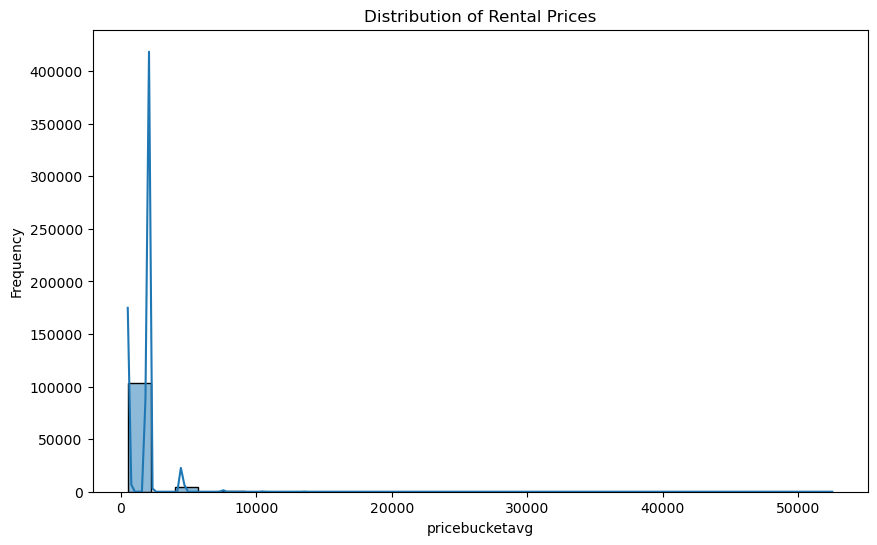

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['pricebucketavg'], bins=30, kde=True)
plt.title('Distribution of Rental Prices')
plt.xlabel('pricebucketavg')
plt.ylabel('Frequency')
plt.show()

C:\Users\peter\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


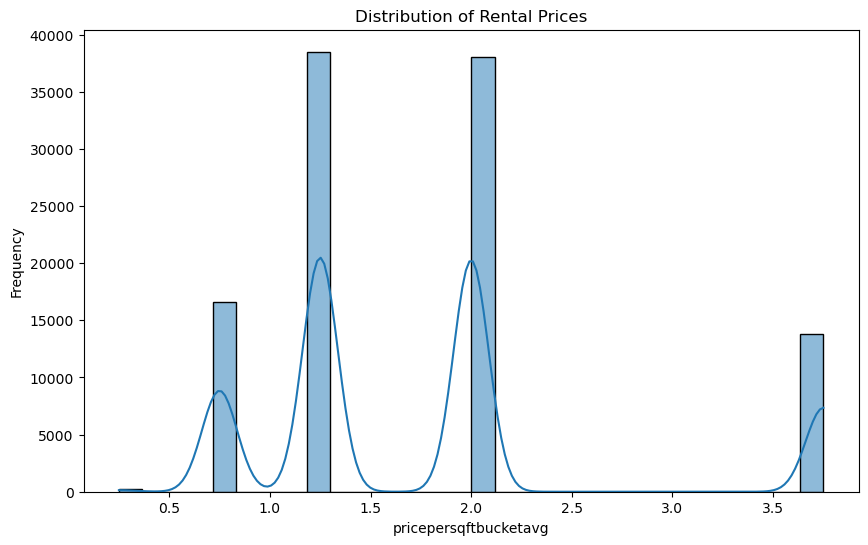

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['pricepersqftbucketavg'], bins=30, kde=True)
plt.title('Distribution of Rental Prices')
plt.xlabel('pricepersqftbucketavg')
plt.ylabel('Frequency')
plt.show()

In [31]:
df['pricepersqftbucketavg'].value_counts()

pricepersqftbucketavg
1.250000    38502
2.000000    38078
0.750000    16617
3.750000    13808
6.275106      860
0.250000      255
Name: count, dtype: int64

In [30]:
# Calculate the average of all cases where pricepersqftbucketavg is inf
inf_avg = df[df['pricepersqftbucketavg'] == float('inf')]['price_per_sqft'].mean()

# Impute the average value in place of inf in pricepersqftbucketavg
df['pricepersqftbucketavg'] = df['pricepersqftbucketavg'].replace(float('inf'), inf_avg)

In [26]:
df['pricebucketavg'].value_counts()

pricebucketavg
2000.0     77253
500.0      25939
4500.0      4572
7500.0       238
10500.0       56
13500.0       33
16500.0        7
25500.0        6
19500.0        4
34500.0        4
52500.0        2
28500.0        2
31500.0        2
22500.0        1
40500.0        1
Name: count, dtype: int64

In [27]:
# making dfmod such that it removes the buckets with less than 10 count of rows/items

# Calculate the count of each pricebucketavg
pricebucketavg_counts = df['pricebucketavg'].value_counts()

# Filter the pricebucketavg values that have more than 10 counts
valid_pricebucketavg = pricebucketavg_counts[pricebucketavg_counts > 10].index

# Create a new dataframe with only the valid rows
dfmod = df[df['pricebucketavg'].isin(valid_pricebucketavg)]


In [52]:
dfmod['pricebucketavg'].value_counts()

pricebucketavg
2000.0     77253
500.0      25939
4500.0      4572
7500.0       238
10500.0       56
13500.0       33
Name: count, dtype: int64

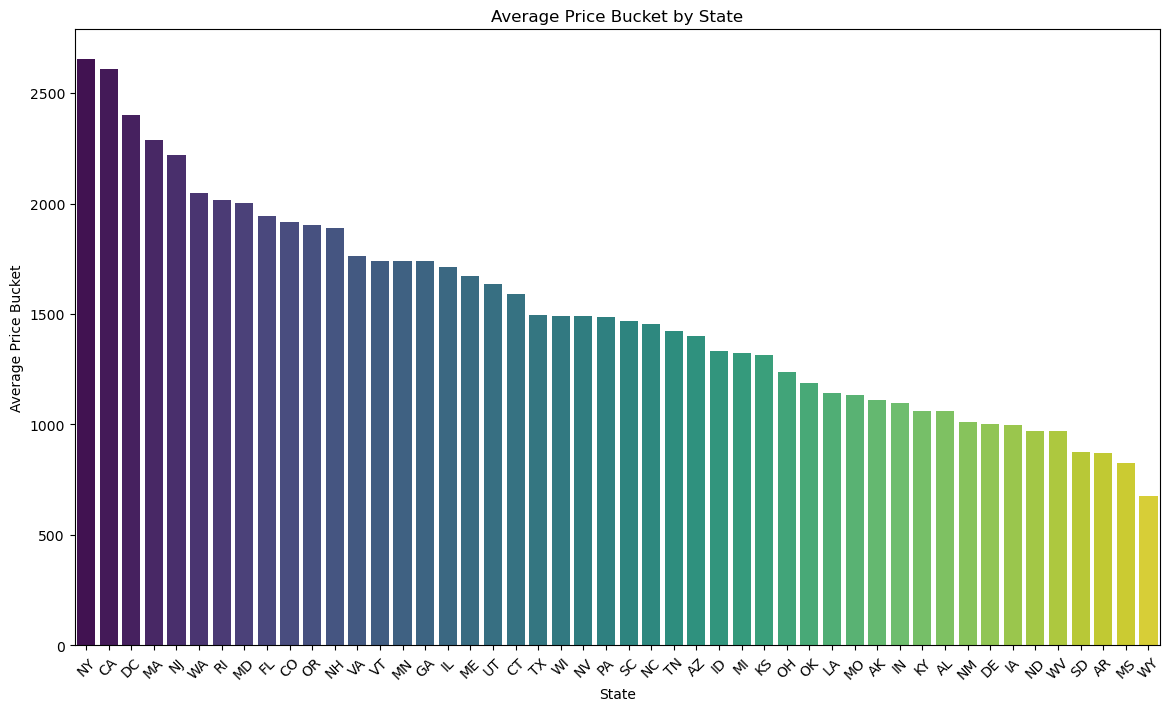

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_pricebucketavg_by_state = df.groupby('state')['pricebucketavg'].mean().reset_index()
avg_pricebucketavg_by_state = avg_pricebucketavg_by_state.sort_values(by='pricebucketavg', ascending=False)
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='state', y='pricebucketavg', data=avg_pricebucketavg_by_state, palette='viridis')
plt.title('Average Price Bucket by State')
plt.xlabel('State')
plt.ylabel('Average Price Bucket')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


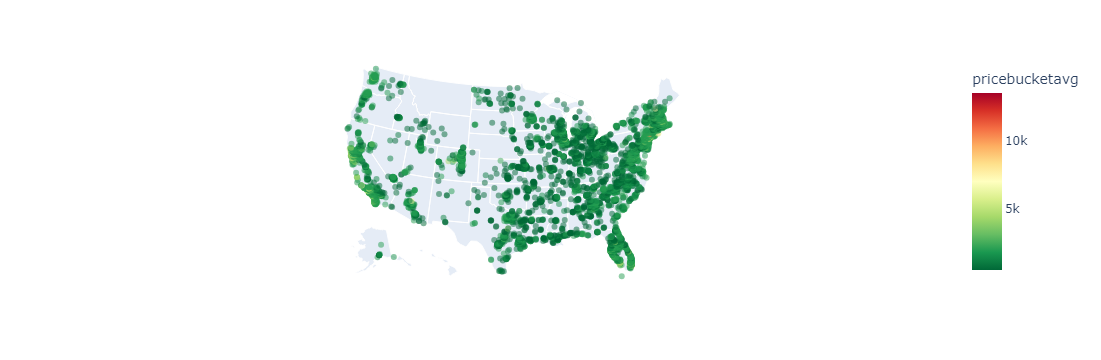

In [50]:
import pandas as pd
import plotly.express as px

# Create an aggregated DataFrame with latitude, longitude, and pricebucketavg
feat_latlon = dfmod.groupby(['latitude', 'longitude'])['pricebucketavg'].mean().reset_index()

def latlon_viz(feat, viz='color'):
    if viz == 'size':
        fig = px.scatter_geo(feat_latlon, lat='latitude', lon='longitude',
                             size=feat, scope='usa',
                             hover_data={'latitude': False, 'longitude': False, feat: True}
                             )
    else:
        fig = px.scatter_geo(feat_latlon, lat='latitude', lon='longitude',
                             color=feat, scope='usa', opacity=0.5,
                             color_continuous_scale='RdYlGn_r',  # Reverse RdYlGn for green to red
                             hover_data={'latitude': False, 'longitude': False, feat: True}
                             )

    fig.show()

# Use the function to visualize pricebucketavg with color coding
latlon_viz('pricebucketavg', 'color')

In [ ]:
#--- We can see that the variation is not that high, that is why the model will not  

In [63]:
# Multi-Colinearity Check
#VIF

# Specify columns to drop
columns_to_drop = ['price', 'ListingNo', 'cityname','state','train','year','month','price_per_sqft', 'pricebucketavg', 'pricepersqftbucketavg']  # Add all the columns you want to drop

# Prepare the data for VIF calculation
X = dfmod.drop(columns=columns_to_drop)

# Encode categorical variables if necessary (e.g., amenities, cityname, state, source)
X = pd.get_dummies(X, drop_first=True)

# Convert True/False to 1/0 for all boolean columns
boolean_columns = X.select_dtypes(include=['bool']).columns

# Convert each boolean column to integer
X[boolean_columns] = X[boolean_columns].astype(int)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


C:\Users\peter\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning:

divide by zero encountered in scalar divide



                Feature         VIF
0             bathrooms   19.441761
1              bedrooms   14.313529
2          pets_allowed    1.840889
3           square_feet   19.214462
4              latitude   93.516943
5             longitude   66.450851
6            population    3.050659
7          racepctblack   15.467841
8          racePctWhite  157.210805
9          racePctAsian    4.719795
10          racePctHisp    4.634394
11            medIncome  372.384692
12            medFamInc  453.333341
13           murdPerPop         inf
14          rapesPerPop         inf
15          robbbPerPop         inf
16        assaultPerPop         inf
17          burglPerPop         inf
18           larcPerPop         inf
19      autoTheftPerPop         inf
20         arsonsPerPop         inf
21  ViolentCrimesPerPop         inf
22        nonViolPerPop         inf
23            avg_crime         inf
24     amenities_luxury    2.751169
25  has_photo_Thumbnail    6.224322
26        has_photo_Yes    7

In [62]:
X.head()

,bathrooms,bedrooms,pets_allowed,square_feet,latitude,longitude,population,racepctblack,racePctWhite,racePctAsian,racePctHisp,medIncome,medFamInc,murdPerPop,rapesPerPop,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop,avg_crime,amenities_luxury,has_photo_Thumbnail,has_photo_Yes,source_RentLingo,source_others
0,1.0,1,1,542,33.8520,-118.3759,60167.0,0.0160,0.8704,0.0683,0.1150,51913.0,58760.0,6.20,26.33,224.60,342.32,1315.08,3348.87,968.11,4.65,599.45,5636.70,1247.231,False,True,False,True,False
1,1.5,3,1,1500,37.0867,-76.4941,170045.0,0.3357,0.6258,0.0233,0.0277,27469.0,31180.0,12.16,56.93,39.24,737.30,1161.22,4016.47,378.05,34.82,845.63,5590.56,1287.238,False,True,False,True,False
2,2.0,3,0,1650,35.8230,-78.6438,207951.0,0.2758,0.6918,0.0247,0.0141,32451.0,42212.0,11.21,39.02,330.02,462.45,1223.37,3900.10,366.56,12.04,842.70,5502.07,1268.954,False,True,False,True,False
3,1.0,2,1,820,38.3622,-121.9712,71479.0,0.0891,0.7884,0.0381,0.1590,40679.0,43574.0,1.20,23.97,89.90,318.85,674.86,2878.03,261.31,32.36,433.92,3846.57,856.097,False,True,False,True,False
4,1.0,1,1,624,35.1038,-106.6110,384736.0,0.0298,0.7824,0.0173,0.3449,27555.0,33746.0,11.91,61.71,369.78,1151.97,1953.47,4896.67,852.49,55.04,1595.37,7757.66,1870.607,False,True,False,True,False


In [ ]:
# Price can vary according to the house size, hence it is necessary to analyse price as well as price per sqft

KMO Model: 0.4093153849871768


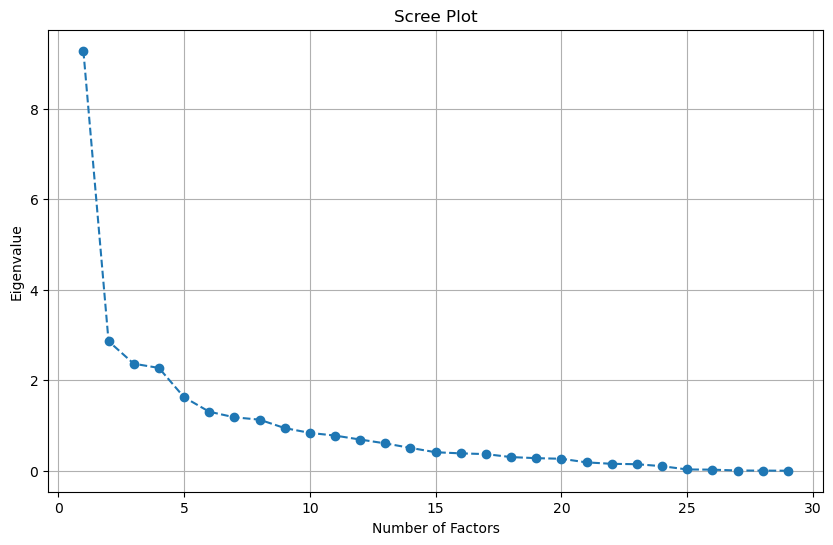

In [68]:
#Factor Analysis - KMO Values

from factor_analyzer import FactorAnalyzer, calculate_kmo
import matplotlib.pyplot as plt

# Step 1: Calculate the KMO value
kmo_all, kmo_model = calculate_kmo(X)
print(f"KMO Model: {kmo_model}")

# Step 2: Perform Factor Analysis
fa = FactorAnalyzer()
fa.fit(X)

# Step 3: Scree Plot
eigenvalues, vectors = fa.get_eigenvalues()

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


In [70]:
X.head()

,bathrooms,bedrooms,pets_allowed,square_feet,latitude,longitude,population,racepctblack,racePctWhite,racePctAsian,racePctHisp,medIncome,medFamInc,murdPerPop,rapesPerPop,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop,avg_crime,amenities_luxury,has_photo_Thumbnail,has_photo_Yes,source_RentLingo,source_others
0,1.0,1,1,542,33.8520,-118.3759,60167.0,0.0160,0.8704,0.0683,0.1150,51913.0,58760.0,6.20,26.33,224.60,342.32,1315.08,3348.87,968.11,4.65,599.45,5636.70,1247.231,0,1,0,1,0
1,1.5,3,1,1500,37.0867,-76.4941,170045.0,0.3357,0.6258,0.0233,0.0277,27469.0,31180.0,12.16,56.93,39.24,737.30,1161.22,4016.47,378.05,34.82,845.63,5590.56,1287.238,0,1,0,1,0
2,2.0,3,0,1650,35.8230,-78.6438,207951.0,0.2758,0.6918,0.0247,0.0141,32451.0,42212.0,11.21,39.02,330.02,462.45,1223.37,3900.10,366.56,12.04,842.70,5502.07,1268.954,0,1,0,1,0
3,1.0,2,1,820,38.3622,-121.9712,71479.0,0.0891,0.7884,0.0381,0.1590,40679.0,43574.0,1.20,23.97,89.90,318.85,674.86,2878.03,261.31,32.36,433.92,3846.57,856.097,0,1,0,1,0
4,1.0,1,1,624,35.1038,-106.6110,384736.0,0.0298,0.7824,0.0173,0.3449,27555.0,33746.0,11.91,61.71,369.78,1151.97,1953.47,4896.67,852.49,55.04,1595.37,7757.66,1870.607,0,1,0,1,0


In [72]:
kmo_all, kmo_model = calculate_kmo(X)
kmo_df = pd.DataFrame({'Variable': X.columns, 'KMO Value': kmo_all})
print(f"KMO Model: {kmo_model}")
print("KMO Values for each variable:")
print(kmo_df)

KMO Model: 0.4093153849871768
KMO Values for each variable:
               Variable  KMO Value
0             bathrooms   0.733125
1              bedrooms   0.762141
2          pets_allowed   0.574943
3           square_feet   0.733789
4              latitude   0.902040
5             longitude   0.651247
6            population   0.855468
7          racepctblack   0.634996
8          racePctWhite   0.673156
9          racePctAsian   0.298724
10          racePctHisp   0.384553
11            medIncome   0.801585
12            medFamInc   0.813637
13           murdPerPop   0.373926
14          rapesPerPop   0.088977
15          robbbPerPop   0.388655
16        assaultPerPop   0.362825
17          burglPerPop   0.374741
18           larcPerPop   0.308425
19      autoTheftPerPop   0.338954
20         arsonsPerPop   0.106226
21  ViolentCrimesPerPop   0.404569
22        nonViolPerPop   0.401290
23            avg_crime   0.426457
24     amenities_luxury   0.454420
25  has_photo_Thumbnail   0.56

In [76]:
# Step 2: Perform Factor Analysis
fa = FactorAnalyzer(n_factors=len(X.columns), rotation=None)
fa.fit(X)

# Step 3: Extract Eigenvalues and Eigenvectors
eigenvalues, _ = fa.get_eigenvalues()

# Create a DataFrame for eigenvalues
eigenvalues_df = pd.DataFrame({'Eigenvalue': eigenvalues})

# Extract the loadings (eigenvectors)
loadings = fa.loadings_

# Create a DataFrame for eigenvectors (factor loadings)
eigenvectors_df = pd.DataFrame(loadings, columns=[f'Factor{i+1}' for i in range(loadings.shape[1])], index=X.columns)

print("Eigenvalues:")
print(eigenvalues_df)
print("\nEigenvectors (Factor Loadings):")
print(eigenvectors_df)


Eigenvalues:
      Eigenvalue
0   9.277399e+00
1   2.861297e+00
2   2.364028e+00
3   2.270892e+00
4   1.623938e+00
5   1.303721e+00
6   1.180098e+00
7   1.128104e+00
8   9.422360e-01
9   8.356213e-01
10  7.764198e-01
11  6.886597e-01
12  6.034253e-01
13  5.040028e-01
14  4.081637e-01
15  3.834043e-01
16  3.668215e-01
17  3.011667e-01
18  2.774891e-01
19  2.637904e-01
20  1.842582e-01
21  1.526632e-01
22  1.437569e-01
23  1.001089e-01
24  2.772301e-02
25  2.362633e-02
26  4.634727e-03
27  2.551582e-03
28 -3.376466e-14

Eigenvectors (Factor Loadings):
                      Factor1   Factor2   Factor3   Factor4   Factor5  \
bathrooms           -0.031425 -0.280670  0.548128  0.615779 -0.030950   
bedrooms            -0.065622 -0.298111  0.470765  0.601226  0.010897   
pets_allowed         0.026476 -0.026056 -0.152445  0.074867 -0.003153   
square_feet         -0.066934 -0.304907  0.527943  0.612564  0.038742   
latitude            -0.359114 -0.026454 -0.091080 -0.064042  0.235166   
longit

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

                     bathrooms  bedrooms  pets_allowed  square_feet  latitude  \
bathrooms             1.000000  0.681871     -0.010190     0.721583 -0.085109   
bedrooms              0.681871  1.000000     -0.017551     0.709037  0.017744   
pets_allowed         -0.010190 -0.017551      1.000000    -0.033477  0.004923   
square_feet           0.721583  0.709037     -0.033477     1.000000 -0.031017   
latitude             -0.085109  0.017744      0.004923    -0.031017  1.000000   
longitude            -0.005913  0.040700     -0.005719     0.065807  0.057293   
population           -0.049388 -0.067818      0.006790    -0.066390 -0.123281   
racepctblack         -0.001057 -0.018559      0.029465    -0.004361 -0.180296   
racePctWhite          0.025220  0.062552     -0.017812     0.053717  0.271415   
racePctAsian         -0.028518 -0.048156     -0.028864    -0.057903  0.034317   
racePctHisp          -0.036926 -0.082599     -0.014860    -0.079953 -0.347448   
medIncome             0.0058

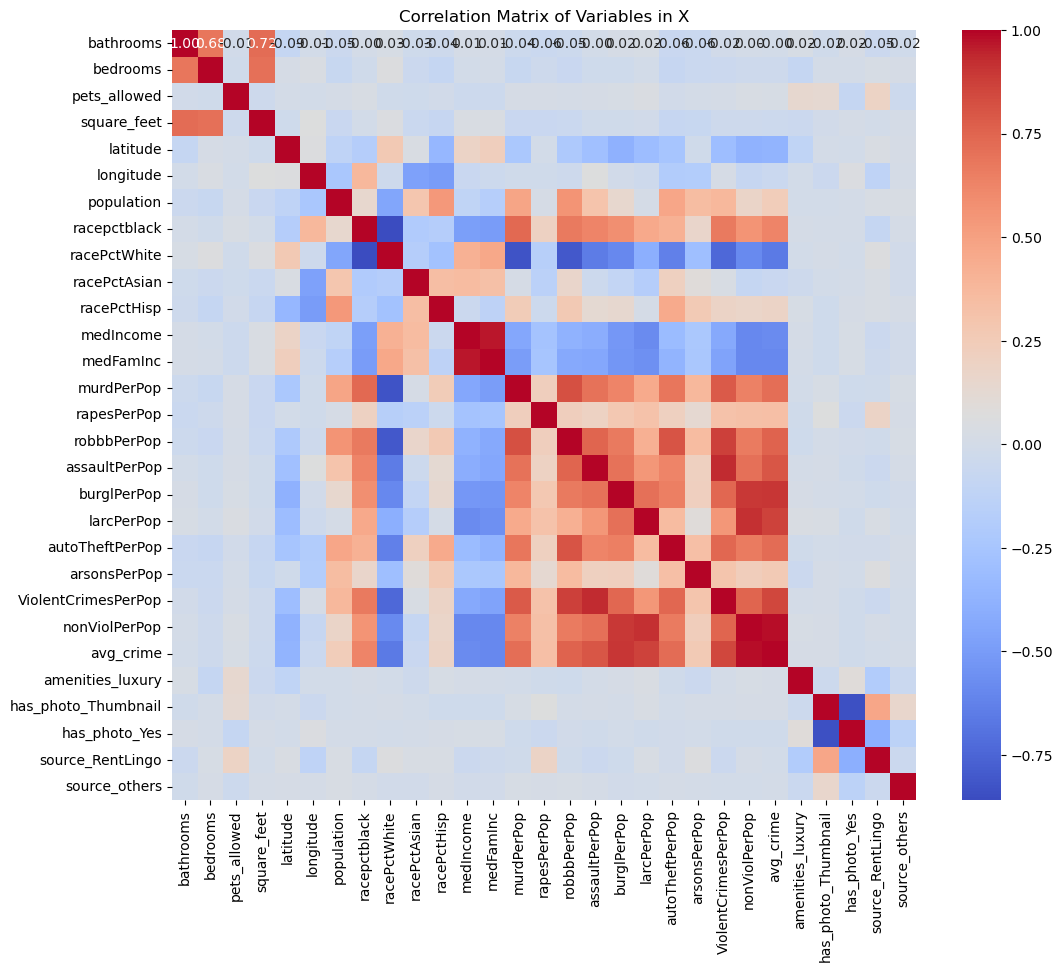

In [77]:
# Calculate the correlation matrix
correlation_matrix = X.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Variables in X')
plt.show()

In [ ]:
''''

Now from this we can assume that, we need to bifurate the data first, without which we will not be able to run a linear regression for price

Hence, we will check multicollinearity based on 3 groups of vvariables, crime based, amenity based, demographic based and check for correlation of
each to eliminate variables

''''

In [78]:
X.columns

Index(['bathrooms', 'bedrooms', 'pets_allowed', 'square_feet', 'latitude',
       'longitude', 'population', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'medIncome', 'medFamInc', 'murdPerPop',
       'rapesPerPop', 'robbbPerPop', 'assaultPerPop', 'burglPerPop',
       'larcPerPop', 'autoTheftPerPop', 'arsonsPerPop', 'ViolentCrimesPerPop',
       'nonViolPerPop', 'avg_crime', 'amenities_luxury', 'has_photo_Thumbnail',
       'has_photo_Yes', 'source_RentLingo', 'source_others'],
      dtype='object')

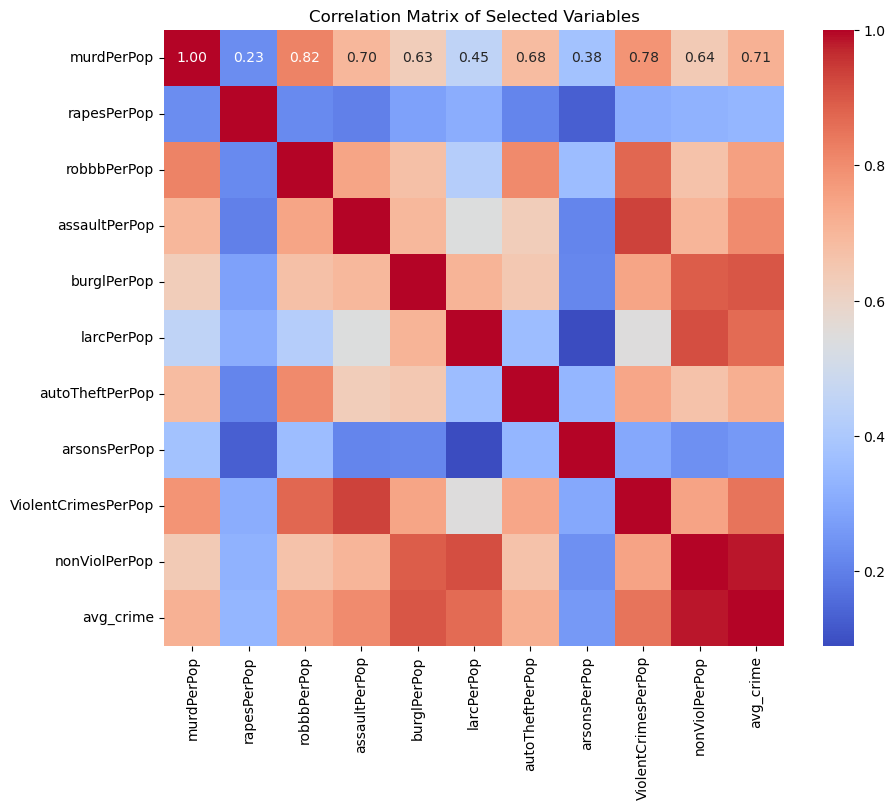

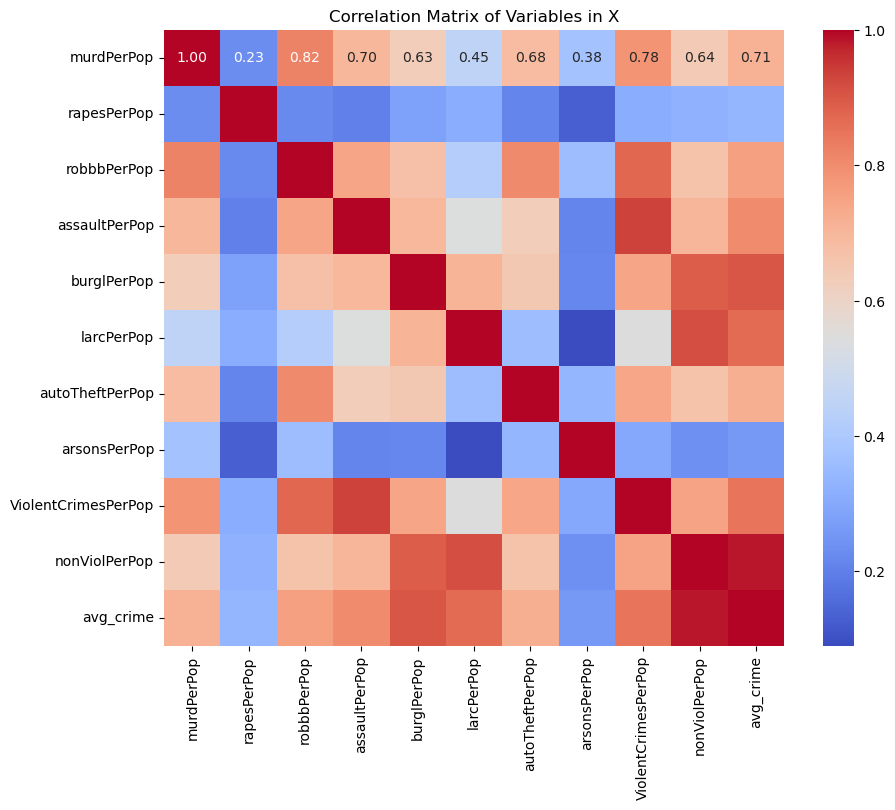

In [81]:
# Select specific variables for the correlation matrix
crime = ['murdPerPop', 'rapesPerPop', 'robbbPerPop', 'assaultPerPop', 'burglPerPop',
       'larcPerPop', 'autoTheftPerPop', 'arsonsPerPop', 'ViolentCrimesPerPop',
       'nonViolPerPop', 'avg_crime']  # Replace with your column names
correlation_matrix = X[crime].corr()

#print(correlation_matrix)

# Plot the correlation matrix with color coding and value labels
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Selected Variables')
plt.show()


Variables removed due to high correlation:
{'avg_crime', 'nonViolPerPop', 'robbbPerPop', 'ViolentCrimesPerPop'}


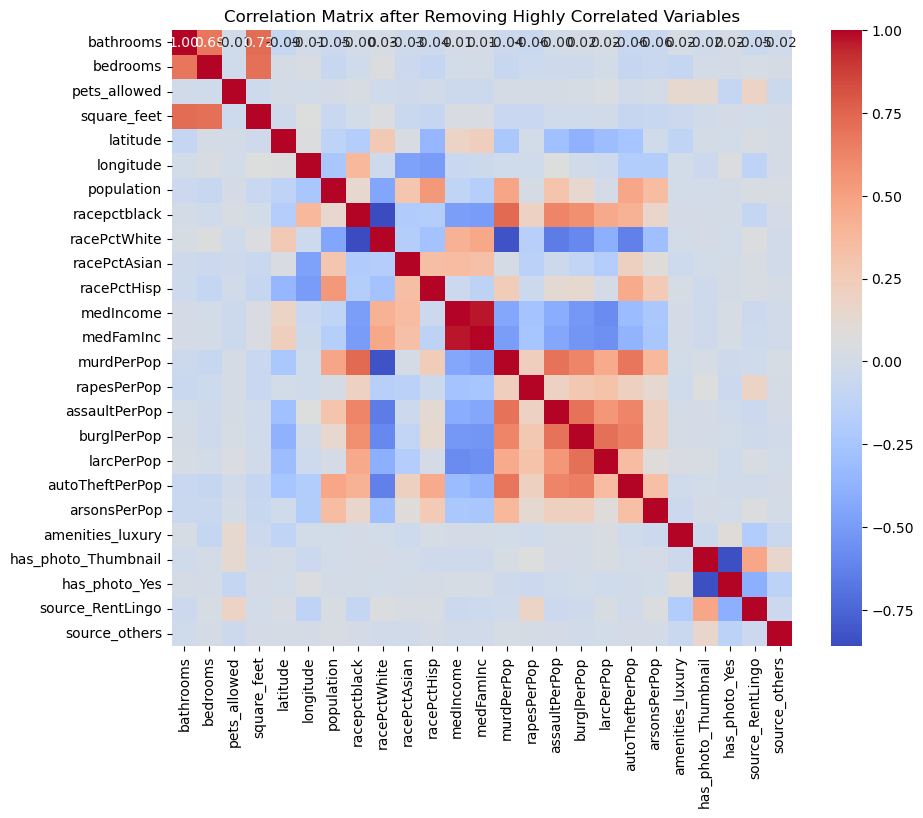

In [83]:
# Identify highly correlated pairs (absolute value > 0.8)
high_corr_pairs = [(var1, var2, correlation_matrix.loc[var1, var2]) 
                   for var1 in correlation_matrix.columns 
                   for var2 in correlation_matrix.columns 
                   if var1 != var2 and abs(correlation_matrix.loc[var1, var2]) > 0.8]

# Create a set to store variables to remove
vars_to_remove = set()

# Iterate over high_corr_pairs and decide which variables to remove
for var1, var2, corr_value in high_corr_pairs:
    # If neither variable is already in the removal set, decide which one to remove
    if var1 not in vars_to_remove and var2 not in vars_to_remove:
        # Example criteria: remove the variable with the higher average correlation with other variables
        avg_corr_var1 = correlation_matrix.loc[var1].mean()
        avg_corr_var2 = correlation_matrix.loc[var2].mean()
        if avg_corr_var1 > avg_corr_var2:
            vars_to_remove.add(var1)
        else:
            vars_to_remove.add(var2)

# Remove the identified variables from the DataFrame
X_reduced = X.drop(columns=list(vars_to_remove))

# Display the variables removed
print("Variables removed due to high correlation:")
print(vars_to_remove)

# Calculate and plot the new correlation matrix
new_correlation_matrix = X_reduced.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(new_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix after Removing Highly Correlated Variables')
plt.show()

In [ ]:
'''
We Can be more aggressive with correlation to eliminate multicollinearity, but we will see the results first, as I think this is the best case
optimized

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     2943.
Date:                Sun, 07 Jul 2024   Prob (F-statistic):               0.00
Time:                        12:54:56   Log-Likelihood:            -6.7486e+05
No. Observations:               86472   AIC:                         1.350e+06
Df Residuals:                   86446   BIC:                         1.350e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2832.7052    

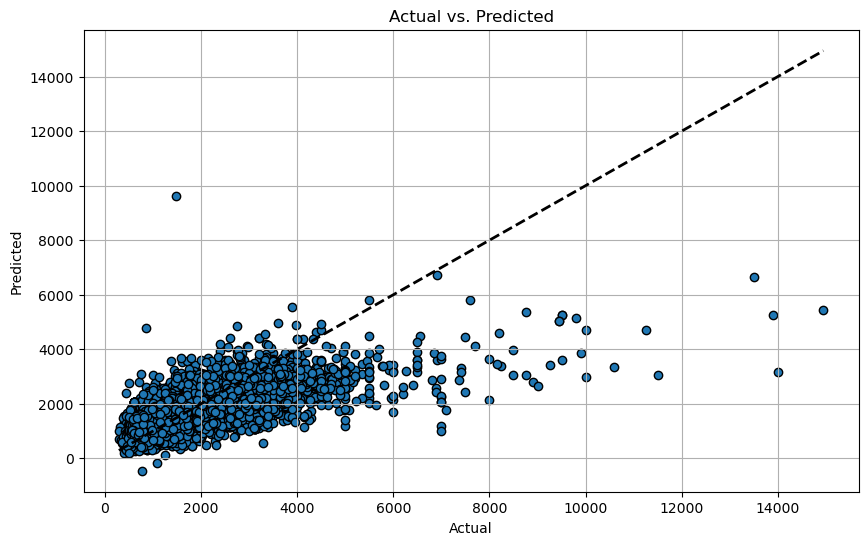

C:\Users\peter\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



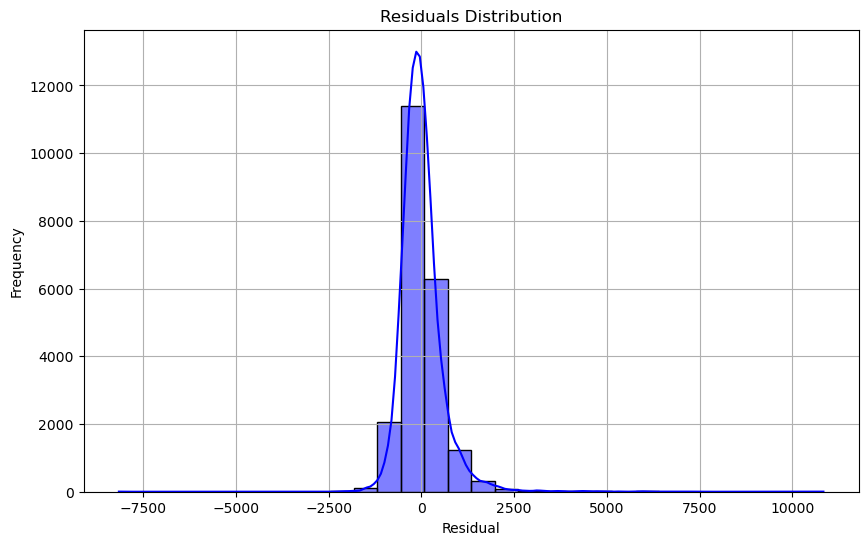

In [86]:
### Linear Regression

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

y = dfmod['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Add a constant to the model (intercept)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Train the linear regression model using statsmodels
model = sm.OLS(y_train, X_train).fit()

# Print the summary to see p-values and other statistics
print(model.summary())

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Generate the resulting table with coefficients and p-values
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.params,
    'P-value': model.pvalues
})
print(coefficients)

# Graphical Representation: Plot Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.grid()
plt.show()

# Graphical Representation: Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.grid()
plt.show()


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     3065.
Date:                Sun, 07 Jul 2024   Prob (F-statistic):               0.00
Time:                        12:57:33   Log-Likelihood:            -6.7486e+05
No. Observations:               86472   AIC:                         1.350e+06
Df Residuals:                   86447   BIC:                         1.350e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2857.6764    

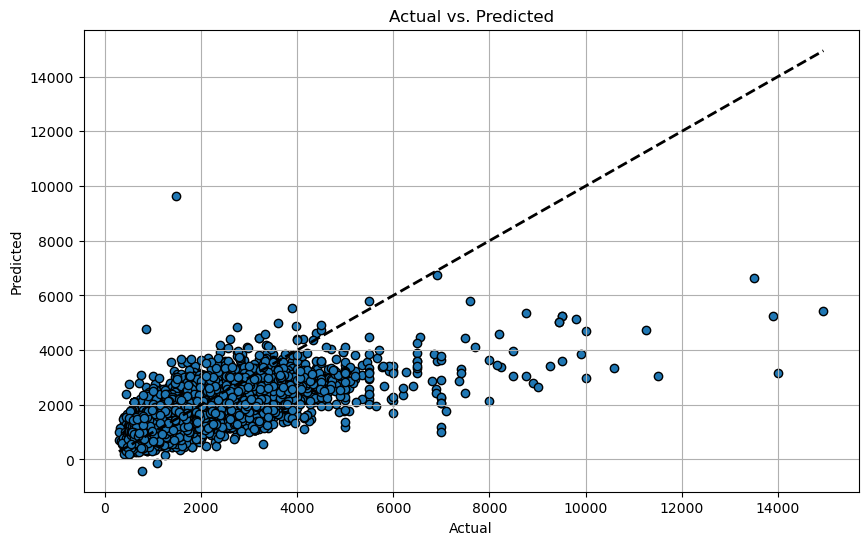

C:\Users\peter\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



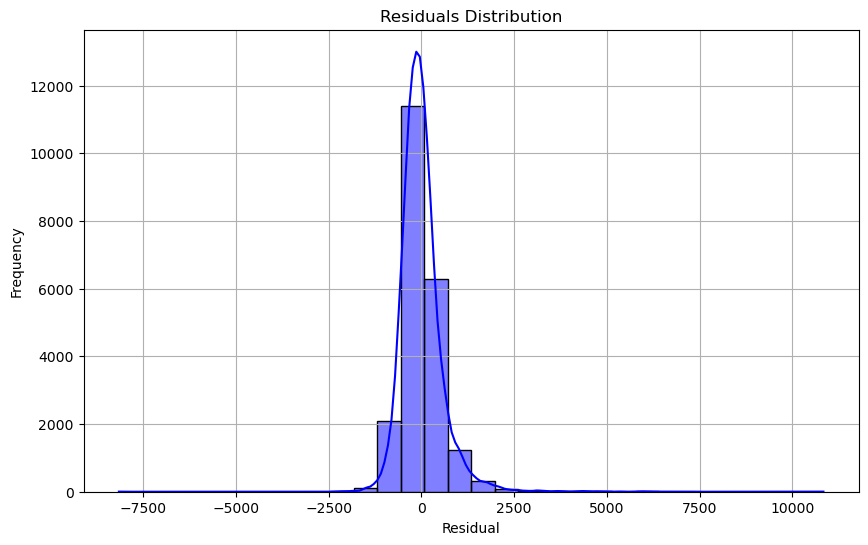

In [87]:
### Linear Regression

#Remove p values more than 0.05

X_reduced1 = X_reduced.drop(columns = 'larcPerPop')

y = dfmod['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced1, y, test_size=0.2, random_state=42)

# Add a constant to the model (intercept)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Train the linear regression model using statsmodels
model = sm.OLS(y_train, X_train).fit()

# Print the summary to see p-values and other statistics
print(model.summary())

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Generate the resulting table with coefficients and p-values
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.params,
    'P-value': model.pvalues
})
print(coefficients)

# Graphical Representation: Plot Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.grid()
plt.show()

# Graphical Representation: Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.grid()
plt.show()


In [ ]:
# Using SVM for Acheiving the same

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

X_reduced1 = X_reduced.drop(columns = 'larcPerPop')

y = dfmod['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced1, y, test_size=0.2, random_state=42)



# Train the SVM regression model
model = SVR(kernel='linear')
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Generate the resulting table with support vectors and their coefficients
support_vectors = model.support_vectors_
dual_coef = model.dual_coef_
support_vector_indices = model.support_

coefficients = pd.DataFrame({
    'Support Vector Index': support_vector_indices,
    'Coefficient': dual_coef[0]
})
print(coefficients)

# Graphical Representation: Plot Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.grid()
plt.show()

# Graphical Representation: Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.grid()
plt.show()
